In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [15]:
heart_data <- read_delim('Data/processed.hungarian.data', col_names = FALSE) |> as_tibble()
heart_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


In [41]:
heart_data <- read_delim('Data/processed.hungarian.data', col_names = FALSE) |> as_tibble()
#reads the raw data and converts it into a tibble with no column names
colnames(heart_data) <- c('age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fbs', 'restecg', 'max_hr', 
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num') 
#assigns names to the columns based on information from the website
heart_data <- mutate(heart_data, sex = as.factor(sex), chest_pain = as.factor(chest_pain), num = as.factor(num), 
    fbs = as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang), thal = as.factor(thal), 
    slope = as.factor(slope), ca = as.factor(ca)) |>
#converts all categorical attributes into factors
filter(chol != '?', trestbps != '?', max_hr != '?', fbs != '?') |>
#removes missing values from the cholesterol, resting blood pressure, fasting blood sugar and maximum 
#heart rate columns
mutate(chol = as.double(chol), trestbps = as.double(trestbps), max_hr = as.double(max_hr))
#converts all numerical attributes into doubles
heart_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,trestbps,chol,fbs,restecg,max_hr,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0
34,0,2,130,161,0,0,190,0,0,?,?,?,0


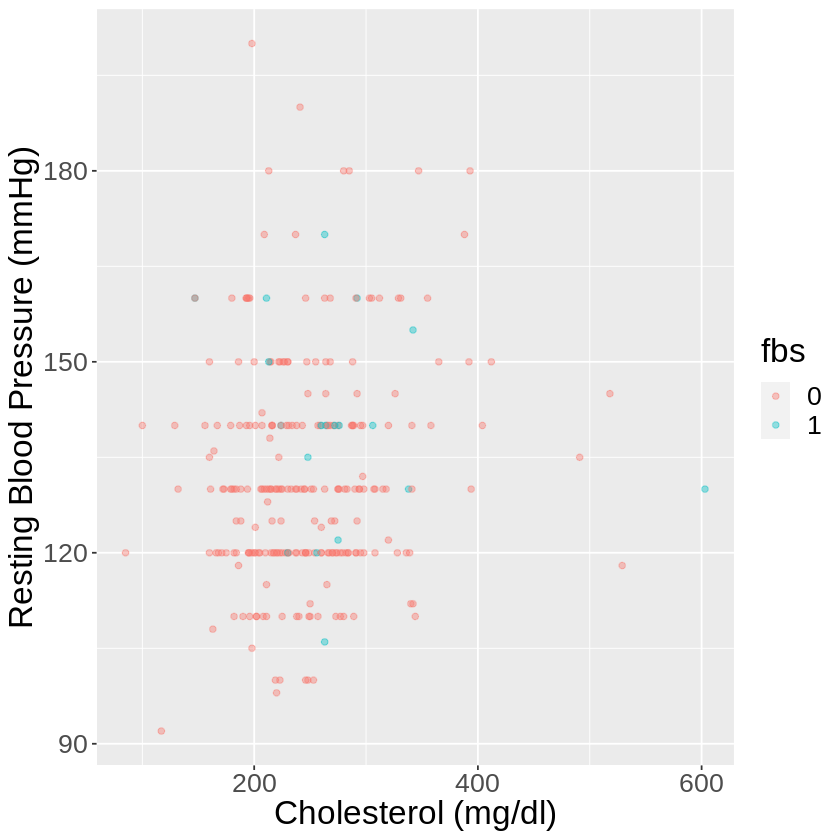

In [42]:
heart_plot_chol_bps <- heart_data |>
                ggplot(aes(x = chol, y = trestbps, color = fbs)) +
                geom_point(alpha = 0.4) +
                theme(text = element_text(size = 20)) +
                labs (x = "Cholesterol (mg/dl)", y = "Resting Blood Pressure (mmHg)")
heart_plot_chol_bps

Clearly based on the plot above, there is no relationship between cholesterol levels and resting blood pressure.